1
2
3
4
5
6


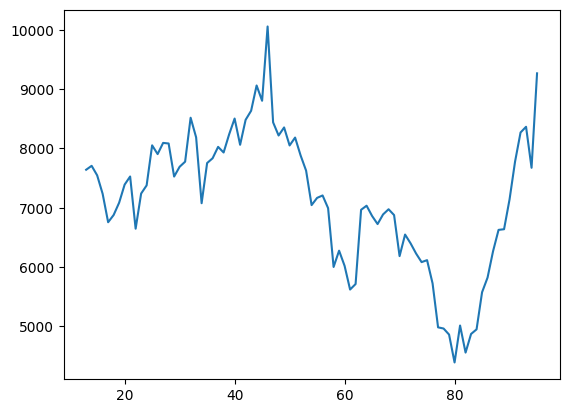

In [64]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])


models = []
for i in range(1,7):
    repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
    aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
    nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
    cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
    zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7']
    doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']
    #
    datum = df['datum']
    x = df[["index", "repo-1", "aktivni-1","nove-1", "doba-1"]]
    
    y = df[['aktivni']]
    #fit linear regression model
    model = sm.OLS(x['index'], y).fit()
    models.append(model)
    #view model summary
    print(i)
    #print(model.summary())
plt.plot(x.index, y)


1
96    9211.181335
dtype: float64


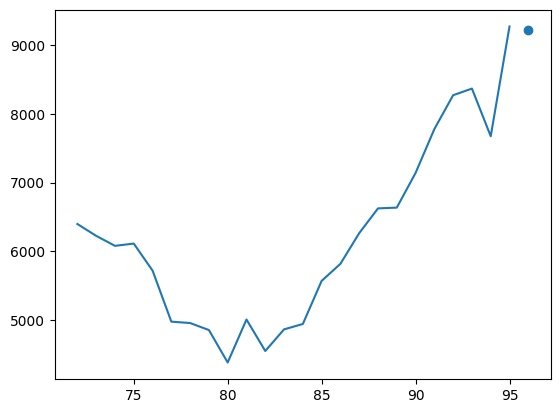

In [88]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
x_new = df
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])

datum = df['datum']
x = df[["index", "repo-1", "aktivni-1","nove-1", "doba-1"]]

y = df[['aktivni']]
#fit linear regression model
model = sm.OLS(y,x).fit()
models.append(model)
#view model summary
print(i)
#print(model.summary())


x_new = x_new.drop(x_new.index[:-12])
x_new = x_new.drop(x_new.index[-11:])

datum = x_new['datum']
x_new = x_new[["index", "repo-1", "aktivni-1","nove-1", "doba-1"]]
#predikce
y_pred = model.predict(x_new)
print(y_pred)
# graf
rozsah = 24
plt.plot(x.index[-rozsah:], y[-rozsah:])
plt.scatter(x_new.index,y_pred)

In [66]:
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
for i in range(1,7):
    x_new = df.drop(df.index[:-12])
    datum = x_new['datum']
    x_new = x_new[["index", "repo-1", "aktivni-1","nove-1", "doba-1"]]
    # vybrat spravnej radek a ostatni odstranit
    x_new_pro_graf = x_new
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[i:])
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[:-1])
    x_new = x_new.reset_index(drop=True)
    x_new = x_new.drop(x_new.index[i:])
    x_new = x_new.drop(x_new.index[:-1])
    print(x_new)
    # vybrat spravnej model
    model = models[i-1]
    #predikce na novych datech
    y_new_pred = model.predict(x_new)
    #print(f"{x_new[['datum']]} : {str(y_new_pred)[2:-2]}\n")
    
    # vytvorit dict pro predikce
    prediction = {"index" : int(x_new_pro_graf.index.values),
                "predikce": int(y_new_pred)}
    # pridat predikce do dictu
    predictions.append(prediction)
# dataframe z predikce dictu
df_predictions = pd.DataFrame(predictions)
print(df_predictions)
#graf
#definovat realna data 
X_graf = df[["index"]]
Y_graf = df[['aktivni']]
import matplotlib.pyplot as plt
plt.plot(X_graf.index[-24:].values,Y_graf[-24:], label='realita')
plt.plot(df_predictions['index'], df_predictions['predikce'], color="green", label="predikce")

plt.ylim(0, 11000)
plt.legend()
plt.show()

   index  repo-1  aktivni-1  nove-1  doba-1
0     96     700     9268.0  2760.0    93.0


ValueError: shapes (1,5) and (1,) not aligned: 5 (dim 1) != 1 (dim 0)